# Classify Real Images and Computer Generated Images

In [1]:
from PIL import Image
import glob
import numpy as np
from pylab import *
# read all of the real images
image_list_real = [Image.open(filename) for filename in glob.glob('/Users/Yixiao/Desktop/TrainingSetScenes/*')]

## Method 1: Grayscale Classifying 

### Main Idea: Compute the sum of difference between (neighbor) points of grayscale histogram (How smooth of the histogram)

In [2]:
# Function of Calculating the difference, 
# Dividing by (row*col), which is the total pixels, 
# to normalize the value of bins
def cal_dif(his,row,col):
    s = 0
    for index in range(len(his)-1):
        s = np.absolute((his[index]-his[index+1])/(row*col))+s
    return s

#### Simple illustration of one of the real images

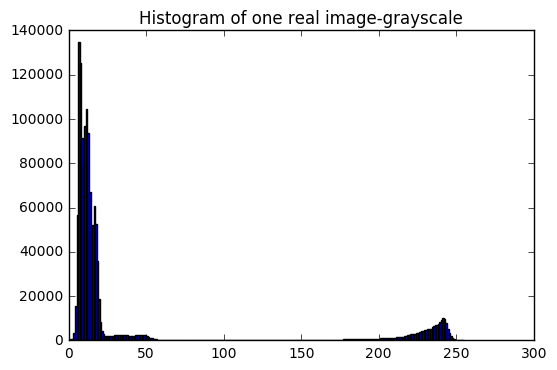

0.25654861111111138

In [3]:
gray = np.asarray(image_list_real[0].convert('L'))
[row,col] = np.shape(gray)
y, x, _ = plt.hist(gray.flatten(),bins = 255)
plt.title("Histogram of one real image-grayscale")
plt.show()
cal_dif(y,row,col)

### Build the statistical model

In [4]:
#for real images
result = []
for index in range(len(image_list_real)):
    gray = np.asarray(image_list_real[index].convert('L'))
    [row,col] = np.shape(gray)
    y, x, _ = plt.hist(gray.flatten(),bins = 255)
    plt.cla()
    plt.clf()
    plt.close('all')
    result.append(cal_dif(y,row,col))

In [5]:
# for computer generated images
number = 0
result_cg = []
for filename in glob.glob('/Users/Yixiao/Desktop/TrainingSetSynthetic/*'):
    im_cg = Image.open(filename)
    gray = np.asarray(im_cg.convert('L'))
    [row,col] = np.shape(gray)
    y, x, _ = plt.hist(gray.flatten(),bins = 255)
    plt.cla()
    plt.clf()
    plt.close('all')
    result_cg.append(cal_dif(y,row,col))
    #number = number+1
    #if(number >80):
        #break

### Histogram of Real Images and Computer generated Images

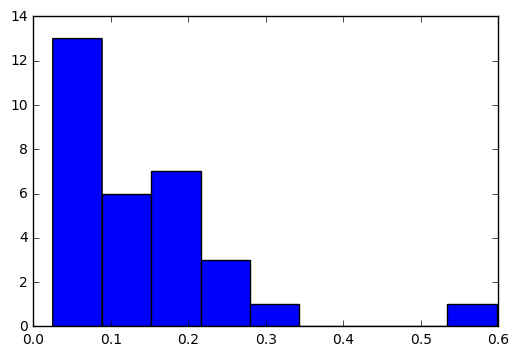

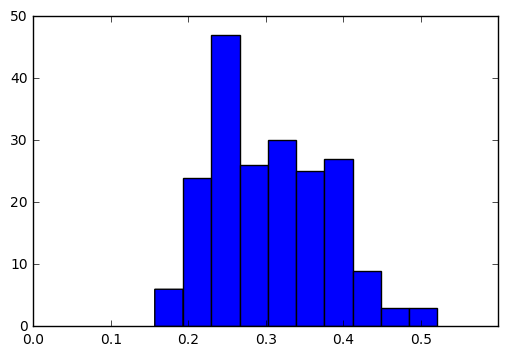

In [6]:
fig, ax1 = plt.subplots()
fig, ax2 = plt.subplots()
y_r,x_r,_ = ax1.hist(result,bins = 'auto')
y_c,x_c,_ = ax2.hist(result_cg,bins = 'auto')
ax2.set_xlim(0,0.6)
plt.show()

### Find threshold based on the proposed Model

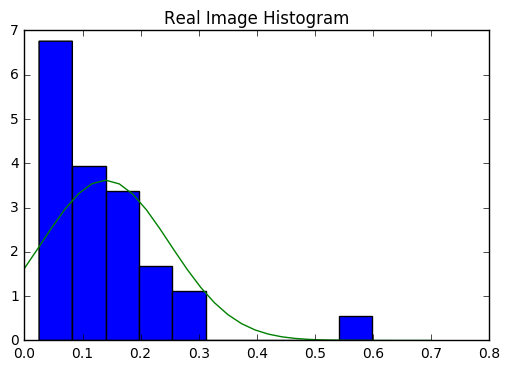

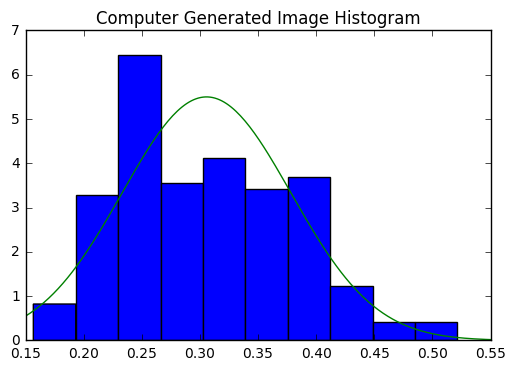

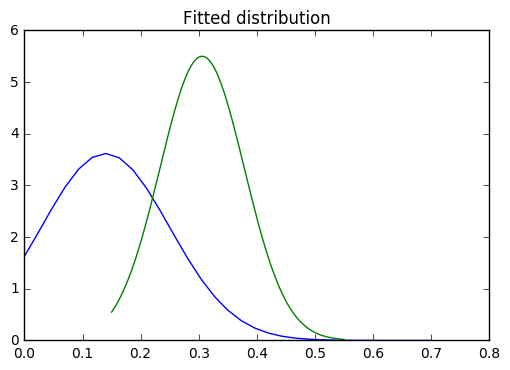

In [7]:
from scipy import stats
# fit the norm distribution model
# plot normed histogram
plt.hist(result, normed=True)

# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc1 = np.linspace(xmin, xmax, len(result))

# lets try the normal distribution first
m1, s1 = stats.norm.fit(result) # get mean and standard deviation  
pdf_g1 = stats.norm.pdf(lnspc1, m1, s1) # now get theoretical values in our interval  
plt.plot(lnspc1, pdf_g1, label="Norm")
plt.title("Real Image Histogram")
plt.show()


#fit the computer generated images
# plot normed histogram
plt.hist(result_cg, normed=True)

# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc2 = np.linspace(xmin, xmax, len(result_cg))

# lets try the normal distribution first
m2, s2 = stats.norm.fit(result_cg) # get mean and standard deviation  
pdf_g2 = stats.norm.pdf(lnspc2, m2, s2) # now get theoretical values in our interval  
plt.plot(lnspc2, pdf_g2, label="Norm")
plt.title("Computer Generated Image Histogram")
plt.show()

fig,ax1 = plt.subplots()
ax1.plot(lnspc1, pdf_g1, label="Norm")
ax1.plot(lnspc2, pdf_g2, label="Norm")
#ax1.plot(lnspc2,mlab.normpdf(lnspc2, m2, s2)/mlab.normpdf(lnspc2, m1, s2),'k--')
plt.title("Fitted distribution")
plt.show()

### Choosing Threshold based on the model

In [8]:
[m1,s1,m2,s2]

[0.1393765794524254,
 0.11024770784019662,
 0.30573896604938278,
 0.072545486304158122]

### find the accuracy of the model

In [9]:
#false positive
threshold = 0.25
fp = len([x for x in result if x>=threshold])/len(result)
#True positive
tp = len([x for x in result_cg if x>=threshold])/len(result_cg)
[fp,tp]

[0.0967741935483871, 0.735]

## Appendix: Alternative Methods we've discussed

### Method 2: Gradient (Not accurate when compared with method 1)

The image gradient is the vector $∇I = [I_{x}, I_{y}]^{T}$. The gradient magnitude is calculated by $|∇I| = \sqrt{I_{x}^2+I_{y}^2}$

Computing the image derivatives can be done using discrete approximations. These are most easily implemented as convolutions: $Ix = I * D_{x}$ and $Iy = I * D_{y}$.

Sobel filters:

$D_{x} =$$\left[ \begin{array}{cccc}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1 \\ \end{array} \right]$
$D_{y} =$$\left[ \begin{array}{cccc}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1 \\ \end{array} \right]$

In [12]:
from PIL import Image
import glob
import numpy as np
from pylab import *
# read all of the real images
image_real_m2 = [Image.open(filename).convert('L') for filename in glob.glob('/Users/Yixiao/Desktop/TrainingSetScenes/*')]
from scipy.ndimage import filters
def get_mag(im):
    im_real = np.asarray(im)
    imx = zeros(im_real.shape)
    filters.sobel(im_real,1,imx)
    imy = zeros(im_real.shape)
    filters.sobel(im_real,0,imy)
    magnitude = sqrt(imx**2+imy**2)
    return magnitude

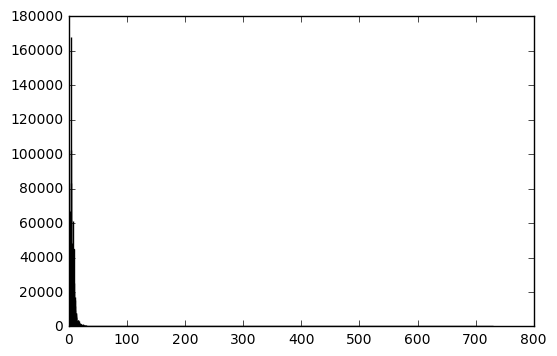

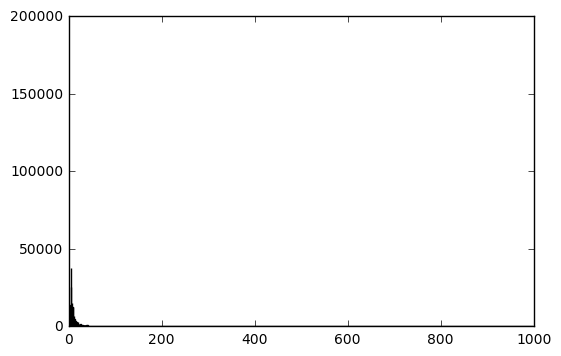

In [13]:
i = Image.open("/Users/Yixiao/Desktop/TrainingSetSynthetic/image99.png").convert('L')
magnitude = get_mag(image_real_m2[0])
y_m, x_m, _ = plt.hist(magnitude.flatten(),bins = 'auto')
#plt.ylim((-100,500000))
plt.show()
magnitude = get_mag(i)
y_m, x_m, _ = plt.hist(magnitude.flatten(),bins = 'auto')
#plt.ylim((-100,500000))
plt.show()

In [14]:
i = Image.open("/Users/Yixiao/Desktop/TrainingSetSynthetic/image99.png").convert('L')
magnitude = get_mag(image_real_m2[0])
y_m, x_m, _ = plt.hist(magnitude.flatten(),bins = 'auto')
r = np.amax(y_m)
magnitude = get_mag(i)
y_m, x_m, _ = plt.hist(magnitude.flatten(),bins = 'auto')
c = np.amax(y_m)

### Method 3: HSV: using saturation (Bad performance)

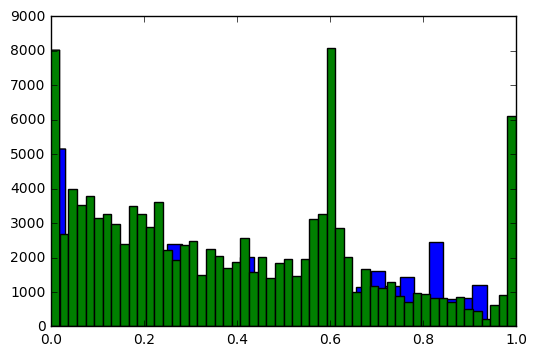

In [17]:
import matplotlib.colors as colors
sa1 = []
sa2 = []
count1 = 0
count2 = 0
for filename in glob.glob('/Users/Yixiao/Desktop/TrainingSetSynthetic/*'):
    im = Image.open(filename)
    array=np.asarray(im)
    arr=(array.astype(float))/255.0
    img_hsv = colors.rgb_to_hsv(arr[:,:,:3])
    sa1.append(img_hsv[:,1].flatten())
    count1 = count1+1
    if(count1>20):
        break
for filename in glob.glob('/Users/Yixiao/Desktop/TrainingSetScenes/*'):
    im = Image.open(filename)
    array=np.asarray(im)
    arr=(array.astype(float))/255.0
    img_hsv = colors.rgb_to_hsv(arr[:,:,:3])
    sa2.append(img_hsv[:,1].flatten())
    count2 = count2+1
    if(count2>20):
        break
r1 = np.concatenate(np.asarray(sa1))
r2 = np.concatenate(np.asarray(sa2))


plt.hist(r1,bins = 'auto')
plt.hist(r2,bins = 'auto')
plt.show()